Bevor Sie dieses Notebook abgeben, testen Sie, ob alles so funktioniert, wie Sie es erwarten. So sollten Sie z.B. den ** Kernel neu starten** (im Menu w&auml;hlen Sie Kernel$\rightarrow$Restart) und dann ** alle Zellen ausf&uuml;hren **  (im Menu w&auml;hlen Sie Cell$\rightarrow$Run All).

F&uuml;llen Sie alle Stellen, die mit  `YOUR CODE HERE` or "YOUR ANSWER HERE" aus. Sie d&uuml;rfen zus&auml;tzlich eigene Zellen und Funktionen definieren, nicht jedoch die Signaturen der gegebenen Funktionsr&uuml;mpfe &auml;ndern.

Bitte beachten Sie auch die "Hinweise zu den Abgaben"-Datei in Moodle.

In [2]:
NAME = "Fabian Flach"

---

Bitte löschen Sie keine Zellen in diesem Notebook und verschieben auch keine. Bitte fügen Sie Ihre Antworten nur in die Zellen ein, wo "your answer here" oder "your Code here" steht. In Notebooks, die nicht automatisch gegraded werden können, werde ich nicht wieder per Hand die automatischen Tests laufen lassen!

In [3]:
import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."

In [4]:
import bvpst as bvp

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.style.use('presentation')

# Beispiele

##  Autobeispiel aus der Vorlesung:
$$ \begin{align*}
		      	y' & = v                                                                      \\
		      	v' & =  -g-\frac{k}{m}(y-u)-\frac{d}{m}(y'-u')                                 \\
		      	   & =  -\frac{k}{m}y-\frac{d}{m}v+\left(-g+\frac{k}{m}u+\frac{d}{m}u'\right). 
                   \end{align*} $$
mit $k=4$, $d=2,$ $m=10$, $g=9.81$.

Randbedingungen:
		      $$ y(0)=10, \quad y(2)=1. $$

## Beispiel 1
$$ \begin{align*}
y_1'&= \frac {4-2*y_2}{t^3}\\
y_2' &= -e^{y_1}
\end{align*} $$

mit den Randwerten $$y_1(1)=0, y_2(2)=0$$

# Aufgaben

##   
Zeigen Sie, dass die exakte Lösung von Beispiel 1 durch $$y_1=\ln(t)$$ und $$y_2(t)=2-t^2/2$$ gegeben ist.

Beweis:

\begin{align*}\\
y_1(t):\\
y_1(t)'&= \frac {4-2*y_2}{t^3}\\
y_1(t)'&= \frac {4-2*(2-\frac {t^2}{2})}{t^3}\\
y_1(t)'&= \frac {4-4+t^2}{t^3}\\
y_1(t)'&= \frac {1}{t}\\
\\
y_1(t) &= ln(t) + a\\
\\
y_1(1) &= 0\\
ln(1) + a &= 0\\
a &= 0\\
y_1(t) &= ln(t)\\
\\
\\
y_2(t):\\
y_2(t)'&= -e^{y_1}\\
y_2(t)'&= -e^{ln(t)}\\
y_2(t)'&= -t\\
\\
y_2(t) &= -\frac {1}{2}*t^2+a\\
\\
y_2(2) &= 0\\
a-\frac {1}{2}*2^2 &= 0\\
a &= 2\\
y_2(t) &= 2-\frac {1}{2}*t^2\\
\end{align*}



##  
Als erstes Testbeispiel dient das bereits in der Vorlesung mit dem Sekantenverfahren gelöste Autobeispiel.
Schreiben Sie eine Routine `bc_auto`, die die Residuen (=Fehler) in den Randwerten für das Autobeispiel aus der Vorlesung ausrechnet. Die Routine soll analog zu `bc` in scipy.integrate.solve_bvp funktionieren, s. Beschreibung dort.
`bc`(y0, yend), Rückgabewert ist $n$-dim np.array, wobei $n$ die Dimension von $y$ ist. 
`bc` ist somit die Funktion, die in der Lösung des RWP 0 sein muss.

In [7]:
def bc_auto(y0, yend):
    ''' 
    :param y0: Wert am linken Intervallrand
    :param yend: Wert am rechten Intervallrand
    :return: Fehler in den Randwerten
    '''
    #res_y0 = np.absolute()
    #res_yend = np.absolute()
    return np.array([y0[0] - 10, yend[0] - 1])
    
    # YOUR CODE HERE
    raise NotImplementedError()

In [8]:
y0 = np.array([10., 2.])
yend = np.array([1., 5.])
assert np.allclose(bc_auto(y0, yend), np.array([0., 0.]))

y0 = np.array([5.5,2.])
yend = np.array([7.,5.])
assert np.allclose(bc_auto(y0, yend), np.array([-4.5, 6.]))

##  
Als zweites Testbeispiel dient Beispiel 1 von oben.
Schreiben Sie eine Routine `bc_bsp1`, die die Residuen (=Fehler) in den Randwerten für das Autobeispiel aus der Vorlesung ausrechnet (für das wir die Lösung des RWP mit dem sekantenverfahren bestimmt hatten). Die Routine soll analog zu `bc` in scipy.integrate.solve_bvp funktionieren.

In [9]:
def bc_bsp1(y0, yend):
    ''' 
    :param y0: Wert am linken Intervallrand
    :param yend: Wert am rechten Intervallrand
    :return: Fehler in den Randwerten
    '''
    return np.array([y0[0], yend[1]])

In [10]:
y0 = np.array([0., 2.])
yend = np.array([1., 0])
assert np.allclose(bc_bsp1(y0, yend), np.array([0., 0.]))


Die Lösung der Dgl. in Ihrem Schießverfahren soll mit einer Python-Bibliotheksroutine erfolgen.
Imlementieren Sie die rechten Seiten der beiden o.g. Differentialgleichungssysteme.

In [11]:
def ode_auto(y, t):
    k = 4
    d = 2
    m = 10
    g = 9.81
    ynew_0 = y[1]
    ynew_1 = -(k/m)*y[0]-(d/m)*y[1]+(-g+(k/m)*np.sin(t)+(d/m)*np.cos(t))
    
    
    return np.array([ynew_0, ynew_1])
    
    raise NotImplementedError()

In [12]:
y0 = np.array([1., -2.])
assert np.allclose(ode_auto(y0, 1.), bvp.ode_auto(y0, 1.))


In [13]:
def ode_bsp1(y, t):
    
    ynew_0 = (4-2*y[1])/(t**3)
    ynew_1 = -np.exp(y[0])
    
    
    return np.array([ynew_0, ynew_1])
    raise NotImplementedError()

In [14]:
y0 = np.array([1., -2.])
assert np.allclose(ode_bsp1(y0, 1.), bvp.ode_bsp1(y0, 1.))

y0 = np.random.rand(2)
t = np.random.randint(1, 5)*1.
assert np.allclose(ode_bsp1(y0, t), bvp.ode_bsp1(y0, t))

##  

Lösen Sie beiden obigen Probleme mit scipy.integrate.solve_bvp und plotten Sie die Lösung.
Vorsicht: Die rechten Seiten haben im Vergleich zu odeint vertauschte Aufruflisten!
Prüfen Sie für Bsp 1, ob die Lösung mit der oben von Ihnen verifizierten Lösung übereinstimmt.

In [15]:
from scipy.integrate import solve_bvp

In [16]:
def switch_auto (x,y):
    return ode_auto(y,x)


In [17]:
# Beispiel Auto
x = np.linspace(0, 2, 100)
y = np.zeros((2, x.size))
y[0,0] = 10
y[0,-1] = 1
sol = solve_bvp(switch_auto, bc_auto, x, y)
sol_x = sol["x"]
sol_y = sol["y"][0]


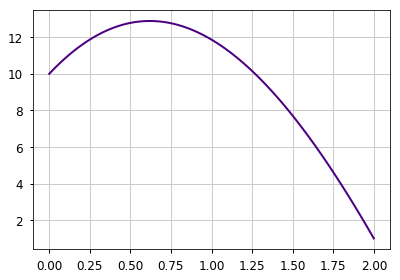

In [18]:
plt.plot(sol_x, sol_y)
plt.show()

In [19]:
def switch_bsp1(x,y):
    return ode_bsp1(y,x)
    

In [20]:
# Beispiel 1
x = np.linspace(1, 2, 100)
y = np.zeros((2, x.size))

sol = solve_bvp(switch_bsp1, bc_bsp1, x, y)
sol_x = sol["x"]
sol_y = sol["y"][0]

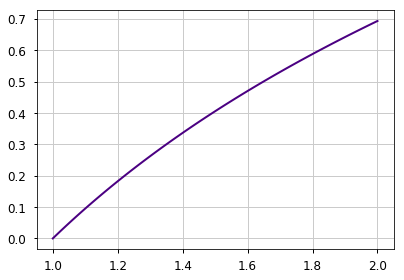

In [21]:
plt.plot(sol_x, sol_y)
plt.show()

##  
Schreiben Sie eine python-Funktion jac_bc, die die Ableitung der Randbedingungen nach den Anfangswerten des Anfangswertproblems numerisch berechnet.
Zur Lösung der Differentialgleichung sollen Sie als Bibliotheksroutine odeint verwenden.
 
Achten Sie darauf, dass die Toleranzen zueinander passen: Die Störung in y bei der numerischen Berechnung der Jacobi-Matrix einer Funktion ff sollte in der Größenordnung $\sqrt{error_{ff}}$ liegen, wobei $error_{ff}$ der Fehler/Ungenauigkeit in der Berechnung der abzuleitenden Funktion ist, s. Numerik I oder z.B. Wikipedia: Numerical differentiation. Was bedeutet dies, wenn ff aus der numerischen Lösung einer Dgl. berechnet wird? 

Testen Sie Ihre Routine und begründen Sie, warum Sie gerade so testen.

In [58]:
def jac_bc(ode, tinterval, y0, bc, rtol, atol):
    '''
    :param ode: rechte seite der Dgl.
    :param tinterval: Integrationsintervall [tstart, tend]
    :param y0: Startwert am linken Intervallrand
    :param bc: Funktion, die die Residuen der randwerte berechnet
    :param rtol, atol: relative und absolute Toleranz (insbes. für odeint), s. odeint
    :return: Jacobi-Matrix: Ableitung der Randwerte nach den Anfangswerten: d bc/ d y0
    '''
    n = y0.size
    jac = np.zeros(shape=(n, n))
    
    yend0 = odeint(ode, y0, tinterval, atol=atol, rtol=rtol)[-1]
    res0 = bc(y0, yend0)
    for i in range(n):
        yd = np.copy(y0)
        #yd = y0[:]
        delta_yd = np.sqrt(np.absolute(yd[i])*rtol + atol)
        yd[i] = y0[i] + delta_yd
        yendd = odeint(ode, yd, tinterval, rtol=rtol, atol=atol)[-1]
        resd = bc(yd, yendd)
        jac[:, i] = (resd - res0)/delta_yd
    
    
    
    return jac
    raise NotImplementedError()

In [23]:
# Hidden Tests - Zelle nicht verändern

In [24]:
# Hidden Tests - Zelle nicht verändern

In [25]:
# Hidden Tests - Zelle nicht verändern

In [26]:
# Hidden Tests - Zelle nicht verändern

Ihre Tests, ob die Routine die Ableitungen der Randbedingungen nach den Anfangswerte korrekt berechnet:

Begründung der Tests

In [59]:
tol = 1e-5
rtol = tol
atol = tol
from scipy.integrate import odeint
import numpy as np
import numpy.linalg as la

y0 = np.array([0., 5.])
tinterval = np.array([0., 2.])
print("jac: ", jac_bc(ode_auto, tinterval, y0, bc_auto, rtol, atol))
print("bvp_jac: ", bvp.jac_bc(ode_auto, tinterval, y0, bc_auto, rtol, atol))

jac:  [[1.         0.        ]
 [0.38327335 1.24375476]]
bvp_jac:  [[1.         0.        ]
 [0.38327335 1.24375476]]


In [60]:
def ode_test_jac(y, t):
    return np.array([t,1])

def bc_test(y0, yend):
    """
    :param y0: Wert am linken Intervallrand
    :param yend: Wert am rechten Intervallrand
    :return: Fehler in den Randwerten
    """
    return np.array([y0[0] - 0, yend[0] - 2])


In [61]:
tol = 1e-4
rtol = tol
atol = tol

y0 = np.array([4,0])
tinterval = np.array([0., 2.])
jac_bc(ode_test_jac, tinterval, y0, bc_test, rtol, atol)


array([[0., 0.],
       [0., 0.]])

Bewertung des Codes:

##  

Schreiben Sie eine python-Funktion `shoot`, die ein Schießverfahren mit der geg. Signatur implementiert. 
 * Zur Lösung der Differentialgleichung sollen wieder die Bibliotheksroutine odeint verwenden.
 * Die nichtlinearen Randwertgleichungen sollen mit dem Newton-Verfahren gelöst werden.
 * Die dazu erforderliche Jacobi-Matrix soll in der Routinen `jac_bc` numerisch berechnet werden. 
 
 Wie sollte  man das Abbruchkriterium für die Newton-Iteration wählen?
 
 Testen Sie die erhaltenen Lösungen.

In [62]:
def shoot(ode, tinterval, y0, bc, rtol, atol):
    '''
    :param ode: rechte Seite der Differentialgleichung
    :param t: Integrationsintervall [t0, tend]
    :param y0: Iterations-Startwert für y
    :param bc: Funktion, die die Residuen  in den Randwerten ausrechnet
    bc(y0, yend), Rückgabewert ist n-dim np.array
    :param rtol, atol: relative und absolute Toleranz (insbes. für odeint), s. odeint
    :return: Startwert für y0, der die bc zu 0 macht
    '''
    yend = odeint(ode, y0, tinterval, rtol=rtol, atol=atol)[-1]
    residuum = bc(y0, yend)
    eps = np.linalg.norm(y0)*rtol + atol
    jacobi = jac_bc(ode, tinterval, y0, bc, rtol, atol)

    while eps < np.linalg.norm(residuum):
        #jacobi = jac_bc(ode, tinterval, y0, bc, rtol, atol)
        dy = np.linalg.solve(jacobi, residuum)
        y0 = y0 - dy
        yend = odeint(ode, y0, tinterval, rtol=rtol, atol=atol)[-1]
        residuum = bc(y0, yend)

    return y0

In [63]:
tol = 1e-5
rtol = tol
atol = tol
from scipy.integrate import odeint
import numpy as np
import numpy.linalg as la

y0 = np.array([0., 5.])
tinterval = np.array([0., 2.])
ylsg =      shoot(ode_auto, tinterval, y0, bc_auto, rtol, atol)
ylsge = bvp.shoot(ode_auto, tinterval, y0, bc_auto, rtol, atol)
assert np.allclose(ylsg, ylsge)

In [64]:
y0 = np.array([1., 1.])
tinterval = np.array([1., 2.])
ylsg =      shoot(ode_bsp1, tinterval, y0, bc_bsp1, rtol, atol)
ylsge = bvp.shoot(ode_bsp1, tinterval, y0, bc_bsp1, rtol, atol)

if not np.allclose(ylsg, ylsge):
    print('Student solution:', ylsg)
    print('Docent solution: ', ylsge)
assert np.allclose(ylsg, ylsge)

In [65]:
tol = 1e-5
rtol = tol
atol = tol
tinterval = np.array([1., 2.])
y0 = np.array([1.1, 1.1])
ylsg =      shoot(ode_bsp1, tinterval, y0, bc_bsp1, rtol, atol)
ylsge = bvp.shoot(ode_bsp1, tinterval, y0, bc_bsp1, rtol, atol)
if(ylsg[0] != ylsge[0] and ylsg[1] != ylsge[1]):
    print("error: \n", "ylsg: ", ylsg, "\nylsge: ", ylsge)
    
y0 = np.array([0.5, 0.5])
ylsg =      shoot(ode_bsp1, tinterval, y0, bc_bsp1, rtol, atol)
ylsge = bvp.shoot(ode_bsp1, tinterval, y0, bc_bsp1, rtol, atol)
if(ylsg[0] != ylsge[0] and ylsg[1] != ylsge[1]):
    print("error: \n", "ylsg: ", ylsg, "\nylsge: ", ylsge)
    
    
y0 = np.array([0.1, 0.1])
ylsg =      shoot(ode_bsp1, tinterval, y0, bc_bsp1, rtol, atol)
ylsge = bvp.shoot(ode_bsp1, tinterval, y0, bc_bsp1, rtol, atol)
if(ylsg[0] != ylsge[0] and ylsg[1] != ylsge[1]):
    print("error: ", y0, "\n", "ylsg: ", ylsg, "\nylsge: ", ylsge)
    
y0 = np.array([1., 0.001])
ylsg =      shoot(ode_bsp1, tinterval, y0, bc_bsp1, rtol, atol)
ylsge = bvp.shoot(ode_bsp1, tinterval, y0, bc_bsp1, rtol, atol)
if(ylsg[0] != ylsge[0] and ylsg[1] != ylsge[1]):
    print("error: ", y0, "\n", "ylsg: ", ylsg, "\nylsge: ", ylsge)
    
y0 = np.array([0.01, 1.])
ylsg =      shoot(ode_bsp1, tinterval, y0, bc_bsp1, rtol, atol)
ylsge = bvp.shoot(ode_bsp1, tinterval, y0, bc_bsp1, rtol, atol)
if(ylsg[0] != ylsge[0] and ylsg[1] != ylsge[1]):
    print("error: ", y0, "\n", "ylsg: ", ylsg, "\nylsge: ", ylsge)

error:  [0.1 0.1] 
 ylsg:  [-8.75062269e-23  1.49999796e+00] 
ylsge:  [-6.64862236e-22  1.49998860e+00]


Meine Gedanken zur Implementation, zu Tests, zur Wahl der Genauigkeiten:

Tests:  
Bei den Tests wollte ich versuchen möglichst viele verschiedene Werte auszuprobieren. Dafür habe ich zwei for Schleifen verwendet. Warum ich bei 0.1 0.1 eine andere Lösung bekomme kann ich mir leider nicht erklären.  
  
Impementation:   
Der Algorithmus verwendet verbessert das gegebene y0 solange mithilfe des Newton Verfahrens bis der Fehler zwischen den tatsächlichen und den gegebenen Randwerten die gegebene Toleranz unterschreitet. Dieser Fehler mit jedem Newton Schritt neu berechnet.  
  
Genauigkeit:  
Damit bestimmen die Toleranzen die Genauigkeit des Ergebnisses. Entscheident ist hierbei die Unterscheidung zwischen relativer und absoluter Toleranz. Die relative Toleranz sort für eine Verhältnismäßigkeit der absoluten Toleranz. So werden die Eingabewerte zur Berechnung der gesamt Toleranz mit der relativen multipliziert und der absoluten Toleranz addiert. 

##  
Plotten Sie für beide Beispiele die Start- und Lösungstrajektorien sowie die Randwerte für beide Beispiele.
Wie viele Iterationen benötigt Ihr Newton-Verfahren? Warum bei dem Beispiel aus der Vorlesung (Auto) so viel weniger als bei Beispiel 1?

Meine Tests und Plots:

In [66]:
tol = 1e-5
rtol = tol
atol = tol

In [67]:
# Auto-Beispiel
# YOUR CODE HERE
# Beispiel Auto

tinterval = np.array([0., 2.])

x = np.linspace(0, 2, 101)

y0 = np.array([5., 0])
sol = odeint(ode_auto, y0, x, rtol=rtol, atol=atol)
sol_y_start = sol[:,0]

y0_end = shoot(ode_auto, tinterval, y0, bc_auto, rtol, atol)
sol = odeint(ode_auto, y0_end, x, rtol=rtol, atol=atol)
sol_y_end = sol[:,0]

Randwerte  
y0: [5, 0]  
yend0: [-12.64076696 -14.20706222]  
1. Iteration:  
    y1: [-13.08297786   9.4299108 ]  
    yend1: [-7.84411766 -3.94205468]  
2. Iteration:  
    y2: [10.0072      9.42697142]  
    yend2: [  1.00294486 -15.4295376 ]  
3. Iteration:  
    y3: [10.0003645   9.42682261]  
    yend3: [  1.00013973 -15.42615701]  
4. Iteration:  
    y4: [10.00000002  9.4268226 ]  
    yend4: [  1.00000001 -15.42597568]  


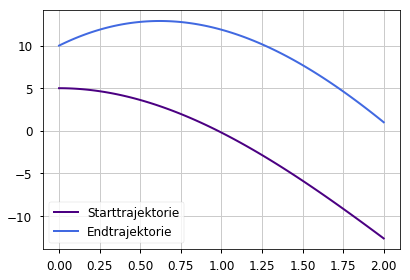

In [68]:
plt.plot(x[:],sol_y_start, label="Starttrajektorie")
plt.plot(x[:],sol_y_end, label="Endtrajektorie")
plt.legend()
plt.show()

In [69]:
# Beispiel 1
y0 = np.array([1., 1.])
tinterval = np.array([1., 2.])
x = np.linspace(1, 2, 101)

sol = odeint(ode_bsp1, y0, x, rtol=rtol, atol=atol)
sol_y_start = sol[:,0]

y0_end = shoot(ode_bsp1, tinterval, y0, bc_bsp1, rtol, atol)
sol = odeint(ode_bsp1, y0_end, x, rtol=rtol, atol=atol)
sol_y_end = sol[:,0]

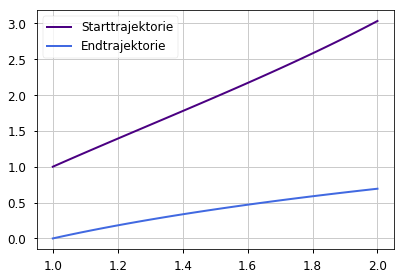

In [70]:
plt.plot(x[:],sol_y_start, label="Starttrajektorie")
plt.plot(x[:],sol_y_end, label="Endtrajektorie")
plt.legend()
plt.show()

In [71]:
def shootPlot(ode, tinterval, y0, bc, rtol, atol):
    '''
    :param ode: rechte Seite der Differentialgleichung
    :param t: Integrationsintervall [t0, tend]
    :param y0: Iterations-Startwert für y
    :param bc: Funktion, die die Residuen  in den Randwerten ausrechnet
    bc(y0, yend), Rückgabewert ist n-dim np.array
    :param rtol, atol: relative und absolute Toleranz (insbes. für odeint), s. odeint
    :return: Startwert für y0, der die bc zu 0 macht
    '''
    sol0 = odeint(ode, y0, tinterval, rtol=rtol, atol=atol)
    yend0 = sol0[-1]
    res = bc(y0, yend0)
    jac = jac_bc(ode, tinterval, y0, bc, rtol, atol)
    result = []
    while la.norm(res) > rtol * np.linalg.norm(y0) + atol:
        try:
            dy = la.solve(jac, res)
        except:
            dy = la.lstsq(jac, res)[0]
            print('LSQ used', dy)
            return (
             jac, res, dy)

        y0 = y0 - dy
        sol = odeint(ode, y0, tinterval, rtol=rtol, atol=atol)
        yend = sol[-1]
        res = bc(y0, yend)
        result.append(y0)

    return result


In [72]:
# Auto
tinterval = np.array([0., 2.])
x = np.linspace(0, 2, 101)
y0 = np.array([5., 0])

sol = odeint(ode_auto, y0, x, rtol=rtol, atol=atol)
sol_y_start = sol[:,0]

results = shootPlot(ode_auto, tinterval, y0, bc_auto, rtol, atol)
jacobi = jac_bc(ode_auto, tinterval, y0, bc_auto, rtol, atol)
print("Anzahl der Iterationen: ", len(results))
print("Jacobi Matrix Randwerte: \n", jacobi)
print("Kondition der Jacobi Matrix: \n", np.linalg.cond(jacobi))

Anzahl der Iterationen:  1
Jacobi Matrix Randwerte: 
 [[1.         0.        ]
 [0.38330295 1.24372176]]
Kondition der Jacobi Matrix: 
 1.4986015977103089


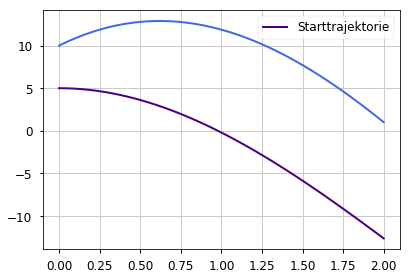

In [73]:
plt.plot(x[:],sol_y_start, label="Starttrajektorie")
for y0_end in results:
    sol = odeint(ode_auto, y0_end, x, rtol=rtol, atol=atol)
    sol_y_end = sol[:,0]
    plt.plot(x[:],sol_y_end)
plt.legend()
plt.show()

In [74]:
# Beispiel 1
tol = 1e-5
rtol = tol
atol = tol

y0 = np.array([1., 1.])
tinterval = np.array([1., 2.])
x = np.linspace(1, 2, 101)

sol = odeint(ode_bsp1, y0, x, rtol=rtol, atol=atol)
sol_y_start = sol[:,0]

results1 = shootPlot(ode_bsp1, tinterval, y0, bc_bsp1, rtol, atol)
jacobi = jac_bc(ode_bsp1, tinterval, y0, bc_bsp1, rtol, atol)
print(len(results1))
print("Anzahl der Iterationen: ", len(results))
print("Jacobi Matrix Randwerte: \n", jacobi)
print("Kondition der Jacobi Matrix: \n", np.linalg.cond(jacobi))

48
Anzahl der Iterationen:  1
Jacobi Matrix Randwerte: 
 [[  1.           0.        ]
 [-16.19183238   8.66330306]]
Kondition der Jacobi Matrix: 
 39.015858938448616


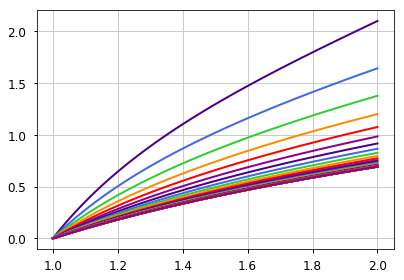

In [75]:
#plt.plot(x[:],sol_y_start, label="Starttrajektorie")
for y0_end in results1[::1]:
    sol = odeint(ode_bsp1, y0_end, x, rtol=rtol, atol=atol)
    sol_y_end = sol[:,0]
    plt.plot(x[:],sol_y_end)
plt.show()

(zusammen mit Jonas Goltz)

Bei der Betrachtung der Jacobimatrizen fällt auf, dass im Auto Beispiel die Einträge vergleichbare Größenordnungen haben. Im Beispiel1 sind diese deutlich unterschiedlich.

Das unterschiedlich gute Konvergenzverhalten liegt an der Kondition der Jacobimatrizen, je schlechter eine Matrix konditioniert ist umso langsamer ist das Konvergenzverhalten. Eine Matrix gilt als schlecht konditioniert, wenn die Kondition deutlich über 1 liegt. Für unser Auto Beispielt liegt diese bei etwa 1.5, während sie für das zweite Beispiel bei über 39 liegt. Damit gilt das Auto Beispiel noch als relativ gut konditioniert, während unser Beispiel 1 schlecht konditioniert ist.
